In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()#current working directory
os.chdir(r'D:\projects\AQI Prediction')
os.getcwd()

'D:\\projects\\AQI Prediction'

In [3]:
df = pd.read_csv("cleaned_city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [4]:
df.shape #rows and columns

(24850, 16)

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,62.208948,75.660357,22.245859,24.432532,29.542967,22.213762,7.011570,17.215217,21.368849,14.851646,18.269981,4.171218,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000
75%,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.397500,3.458668,9.525714,3.588683,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
#EDA – CELL

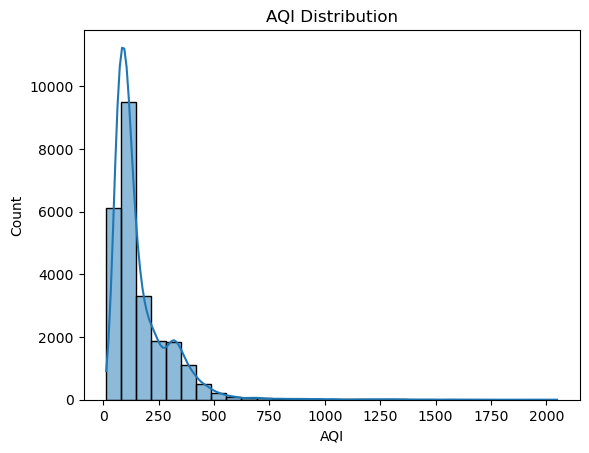

In [7]:
#AQI Distribution
plt.figure()
sns.histplot(df["AQI"], bins=30, kde=True)
plt.title("AQI Distribution")
plt.show()

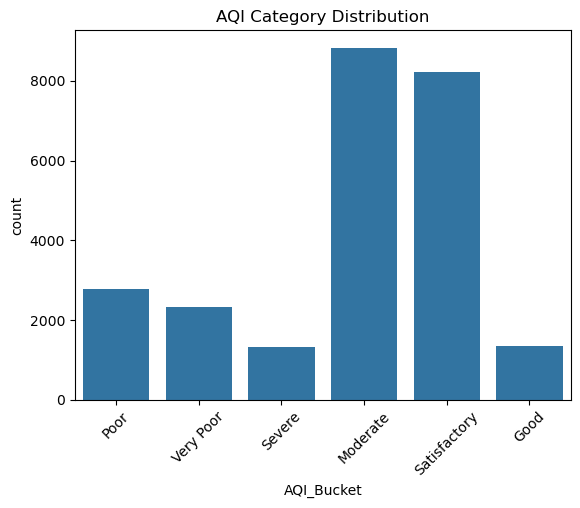

In [8]:
#AQI Category Count
sns.countplot(x="AQI_Bucket", data=df)
plt.xticks(rotation=45)
plt.title("AQI Category Distribution")
plt.show()

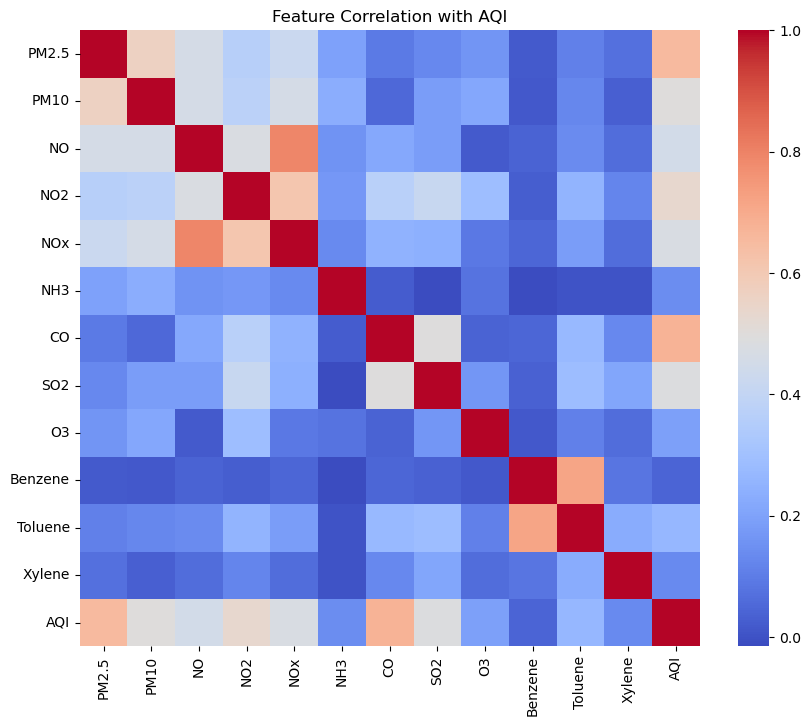

In [9]:
#Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Feature Correlation with AQI")
plt.show()

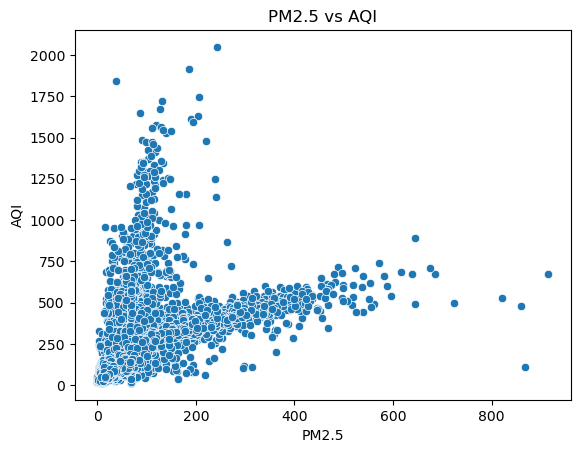

In [10]:
#PM2.5 vs AQI
sns.scatterplot(x="PM2.5", y="AQI", data=df)
plt.title("PM2.5 vs AQI")
plt.show()

In [11]:
#PM2.5 and PM10 were analyzed first because they are the dominant contributors to AQI. Other pollutants were included during modeling, but EDA focused on the most influential features for clarity.
#PM2.5 & PM10 → strongest AQI impact
#Seasonal AQI spikes
#Category imbalance